In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from time import time
import numpy as np
from numba import jit

In [22]:
def draw(eq, area=[[-1,-1],[1,1]], resolution = 100, mode = "cart", az = 60, el = 30):
    print("Calculating coordinates")
    t=time()
    x,y,z,w = [],[],[],[]
    fig = plt.figure(figsize=[10,6.7])
    ax = fig.gca(projection='3d')
    if mode != "polar1":
        ax.view_init(elev=el, azim=az)
    else:    
        ax.view_init(elev=el, azim=-az)
    xap, yap, zap, wap = x.append, y.append, z.append, w.append
    if mode == "cart":
        n = area[0][0]
        while n < area[1][0]:
            n += ( area[1][0] - area[0][0] )/ resolution
            m = area[0][1]
            while m < area[1][1]:
                    m += ( area[1][1] - area[0][1] ) / resolution
                    Z = complex(n,m)
                    p=0
                    for e in range(len(eq)):
                        p+=eq[e] * (Z**e)
                    xap(Z.real)
                    zap(Z.imag)
                    yap(p.real)
                    wap(p.imag)
        ax.legend(handles=[
        mpatches.Patch(color=(0,0,1), label="Im(f(Z)) = "+str(max(w)-max(w)%0.001)),
        mpatches.Patch(color=(0,1,0), label="Im(f(Z)) = 0"),
        mpatches.Patch(color=(1,0,0), label="Im(f(Z)) = "+str(min(w)-min(w)%0.001))])
        ax.set_xlabel("Re(Z)")
        ax.set_ylabel("Im(Z)")
        ax.set_zlabel("Re(f(Z))")
    elif mode == "polar1":
        n = area[0][0]
        while n < area[1][0]:
            n += ( area[1][0] - area[0][0] )/ resolution
            m = area[0][1]
            while m < area[1][1]:
                    m += ( area[1][1] - area[0][1] ) / resolution
                    Z = complex(n,m)
                    p=0
                    for e in range(len(eq)):
                        p+=eq[e] * (Z**e)
                    zap(abs(Z))
                    xap(np.angle(Z))
                    yap(abs(p))
                    wap(np.angle(p))
        ax.legend(handles=[
        mpatches.Patch(color=(1,0,0), label="Arg(f(Z)) = pi"),
        mpatches.Patch(color=(0,1,0), label="Arg(f(Z)) = 0")])
        ax.set_xlabel("Arg(Z)")
        ax.set_ylabel("|Z|")
        ax.set_zlabel("|f(Z)|")
    elif mode == "polar2":
        n = area[0][0]
        while n < area[1][0]:
            n += ( area[1][0] - area[0][0] )/ resolution
            m = area[0][1]
            while m < area[1][1]:
                    m += ( area[1][1] - area[0][1] ) / resolution
                    Z = complex(n,m)
                    p=0
                    for e in range(len(eq)):
                        p+=eq[e] * (Z**e)
                    xap(abs(Z))
                    zap(np.angle(Z))
                    wap(abs(p))
                    yap(np.angle(p))
        ax.set_xlabel("|Z|")
        ax.set_ylabel("Arg(Z)")
        ax.set_zlabel("Arg(f(Z))")
        ax.legend(handles=[
        mpatches.Patch(color=(0,0,1), label="|f(Z)| = "+str(max(w)-max(w)%0.001)),
        mpatches.Patch(color=(0,1,0), label="|f(Z)| = 0")])
    elif mode == "polar3":
        n = area[0][0]
        while n < area[1][0]:
            n += ( area[1][0] - area[0][0] )/ resolution
            m = area[0][1]
            while m < area[1][1]:
                    m += ( area[1][1] - area[0][1] ) / resolution
                    θ = complex(n,m)
                    r=0
                    for e in range(len(eq)):
                        r+=eq[e] * (θ**e)
                    xap((r*np.cos(θ)).real)
                    zap((r*np.cos(θ)).imag)
                    wap((r*np.sin(θ)).imag)
                    yap((r*np.sin(θ)).real)
        ax.set_xlabel("Re(rcosθ)")
        ax.set_ylabel("Re(rsinθ)")
        ax.set_zlabel("Im(rcosθ)")
        ax.legend(handles=[
        mpatches.Patch(color=(0,0,1), label="Im(Rsinθ) = "+str(max(w)-max(w)%0.001)),
        mpatches.Patch(color=(0,1,0), label="Im(Rsinθ) = 0"),
        mpatches.Patch(color=(1,0,0), label="Im(Rsinθ) = "+str(min(w)-min(w)%0.001))])
    print("Finished computing in", (time()-t)-(time()-t)%0.01,"seconds")
    ax.set_title("r = "+" + ".join([str(eq[-i-1])+"θ^"+str(len(eq)-i-1) for i in range(len(eq)-1)])+" + "+str(eq[0]))
    if max(w) < abs(min(w)):
        m = abs(min(w))
    else:
        m = max(w)
    cs = []
    for i in w:
        if mode == "cart" or mode == "polar2":
            if i > 0: cs.append((0,1-i/m,i/m))
            elif i < 0: cs.append((abs(i)/m,1-abs(i)/m,0))
            else: cs.append((0,1,0))
        elif mode == "polar1":
            if i != 0: cs.append((abs(i)/m,1-abs(i)/m,0))
            else: cs.append((0,1,0))
    print("Colourmap generated")
    t=time()
    ax.scatter(x, z, y, ',', color = cs)
    print("Drawn in",(time()-t)-(time()-t)%0.01,"seconds\nEstimated load time:", ((time()-t)-(time()-t)%0.1)*3, "seconds")
    t = time()
    plt.show()
    print("Loaded in",(time()-t)-(time()-t)%0.01,"seconds")

Calculating coordinates
Finished computing in 0.5 seconds
Colourmap generated
Drawn in 0.22 seconds
Estimated load time: 0.6000000000000001 seconds


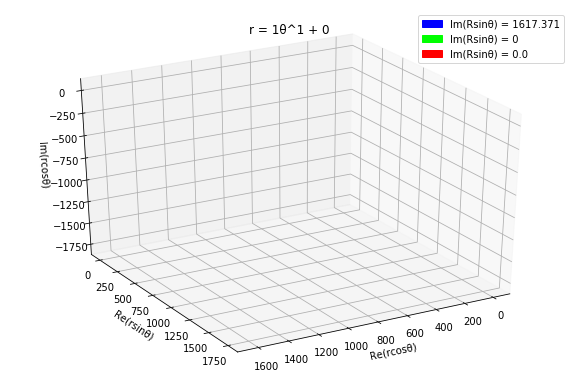

Loaded in 4.83 seconds


In [26]:
draw([0,1], [[0,0],[1,2*np.pi]], 200, "polar3")

Calculating coordinates
Finished computing in 0.14 seconds
Colourmap generated
Drawn in 1.59 seconds
Estimated load time: 4.5 seconds


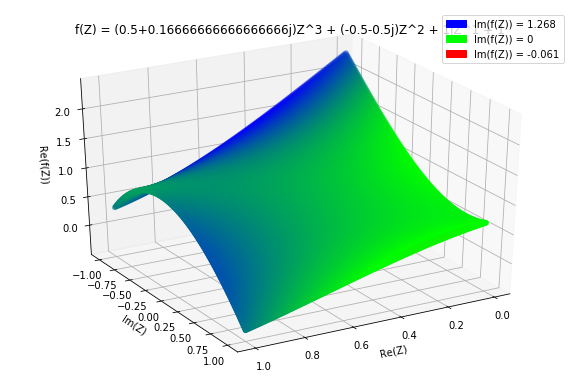

Loaded in 5.65 seconds


In [42]:
i=complex(0,1)
draw([1,i,i*(i-1)/2,i*(i-1)*(i-2)/6], [[0,-1],[1,1]], 200, "cart")

In [2]:
def cdraw(area=[[-1,-1],[1,1]], resolution = 10, mode = "cart"):
    print("Calculating coordinates")
    t=time()
    x,y,z,w = [],[],[],[]
    n = area[0][0]
    fig = plt.figure(figsize=[15,10])
    ax = fig.gca(projection='3d')
    while n < area[1][0]:
        n += ( area[1][0] - area[0][0] )/ resolution
        m = area[0][1]
        while m < area[1][1]:
                m += ( area[1][1] - area[0][1] ) / resolution
                Z = complex(n,m)
                for i in range(2):
                    if round(Z.real,5) != 0 or round(Z.imag,5) != 0:
                        p = np.log(np.log(np.sin(Z)))
                    else:
                        p = complex(0,0)
                    if mode == "cart":
                        x.append(Z.real)
                        z.append(Z.imag)
                        y.append(p.real)
                        w.append(p.imag)
                    elif mode == "polar1":
                        z.append(abs(Z))
                        x.append(np.angle(Z))
                        y.append(abs(p))
                        w.append(np.angle(p))
                    elif mode == "polar2":
                        x.append(abs(Z))
                        z.append(np.angle(Z))
                        w.append(abs(p))
                        y.append(np.angle(p))
    if mode == "cart":
        ax.legend(handles=[
        mpatches.Patch(color=(0,0,1), label="Im(f(Z)) = "+str(max(w)-max(w)%0.001)),
        mpatches.Patch(color=(0,1,0), label="Im(f(Z)) = 0"),
        mpatches.Patch(color=(1,0,0), label="Im(f(Z)) = "+str(min(w)-min(w)%0.001))])
        ax.set_xlabel("Re(Z)")
        ax.set_ylabel("Im(Z)")
        ax.set_zlabel("Re(f(Z))")
    if mode == "polar1":
        ax.legend(handles=[
        mpatches.Patch(color=(1,0,0), label="Arg(f(Z)) = pi"),
        mpatches.Patch(color=(0,1,0), label="Arg(f(Z)) = 0")])
        ax.set_xlabel("Arg(Z)")
        ax.set_ylabel("|Z|")
        ax.set_zlabel("|f(Z)|")
    if mode == "polar2":
        ax.set_xlabel("|Z|")
        ax.set_ylabel("Arg(Z)")
        ax.set_zlabel("Arg(f(Z))")
        ax.legend(handles=[
        mpatches.Patch(color=(0,0,1), label="|f(Z)| = "+str(max(w)-max(w)%0.001)),
        mpatches.Patch(color=(0,1,0), label="|f(Z)| = 0")])
    print("Finished computing in", (time()-t)-(time()-t)%0.01,"seconds")
    if max(w) < abs(min(w)):
        m = abs(min(w))
    else:
        m = max(w)
    cs = []
    for i in range(len(w)):
        if mode == "cart" or mode == "polar2":
            if w[i] > 0: cs.append((0,1-w[i]/m,w[i]/m))
            elif w[i] < 0: cs.append((abs(w[i])/m,1-abs(w[i])/m,0))
            else: cs.append((0,1,0))
        elif mode == "polar1":
            if i != 0: cs.append((abs(w[i])/m,1-abs(w[i])/m,0))
            else: cs.append((0,1,0))
                
    for i in range(len(cs)):
        if cs[i][0] > 1 or cs[i][1] > 1 or cs[i][2] > 1:
            cs[i] == (0,0,0)
    print("Colourmap generated")
    t=time()
    ax.scatter(x, z, y, ',', color = cs)
    print("Drawn in",(time()-t)-(time()-t)%0.01,"seconds\nEstimated load time:", ((time()-t)-(time()-t)%0.1)*3, "seconds")
    t = time()
    plt.show()
    print("Loaded in",(time()-t)-(time()-t)%0.01,"seconds")
    plt.close(fig)

Calculating coordinates
Finished computing in 4.74 seconds
Colourmap generated
Drawn in 11.82 seconds
Estimated load time: 35.400000000000006 seconds


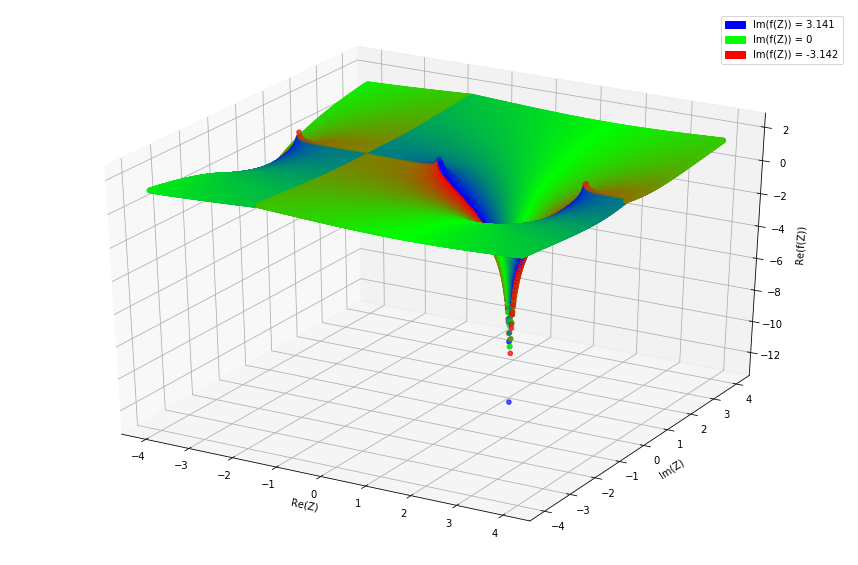

Loaded in 57.01 seconds


In [6]:
cdraw([[-4,-4],[4,4]], 500)

Calculating coordinates
Finished computing in 0.19 seconds
Colourmap generated
Drawn in 2.64 seconds
Estimated load time: 7.800000000000001 seconds


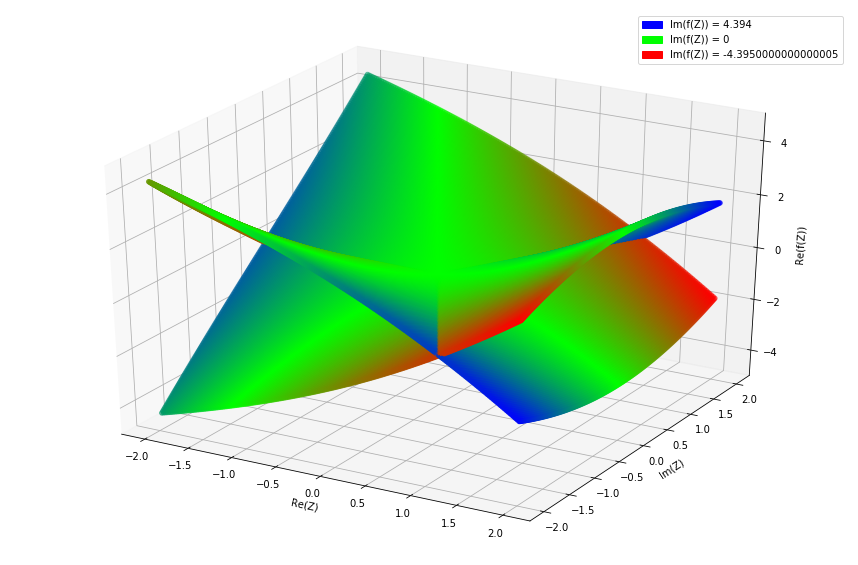

Loaded in 7.72 seconds


In [13]:
cdraw([[-2,-2],[2,2]], 200, "cart")

Calculating coordinates
Finished computing in 1.18 seconds
Colourmap generated
Drawn in 2.75 seconds
Estimated load time: 8.100000000000001 seconds


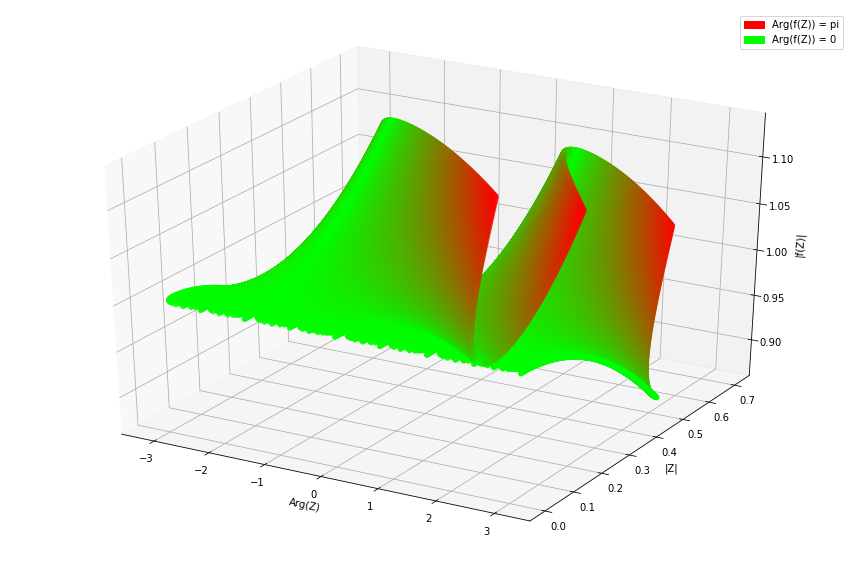

Loaded in 12.700000000000001 seconds
Calculating coordinates
Finished computing in 1.1400000000000001 seconds
Colourmap generated
Drawn in 5.3100000000000005 seconds
Estimated load time: 15.900000000000002 seconds


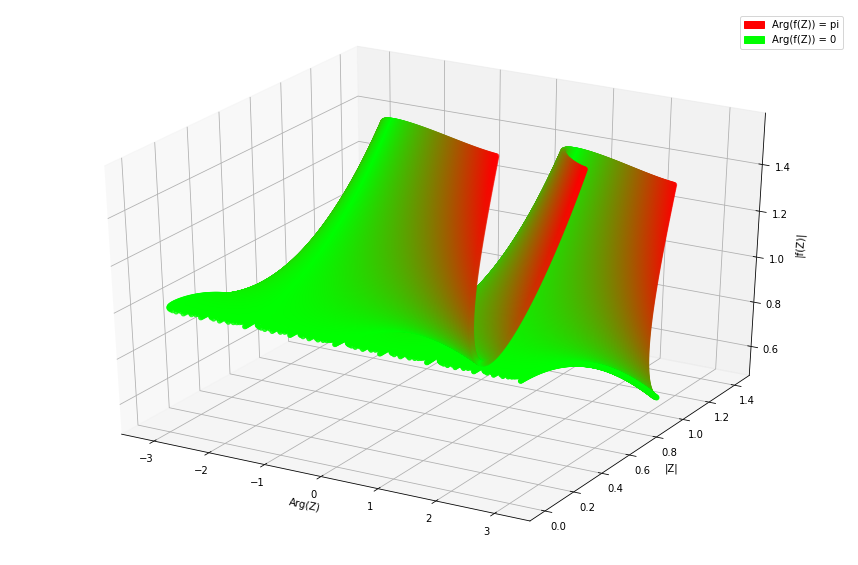

Loaded in 12.36 seconds
Calculating coordinates
Finished computing in 1.1 seconds
Colourmap generated
Drawn in 5.21 seconds
Estimated load time: 15.600000000000001 seconds


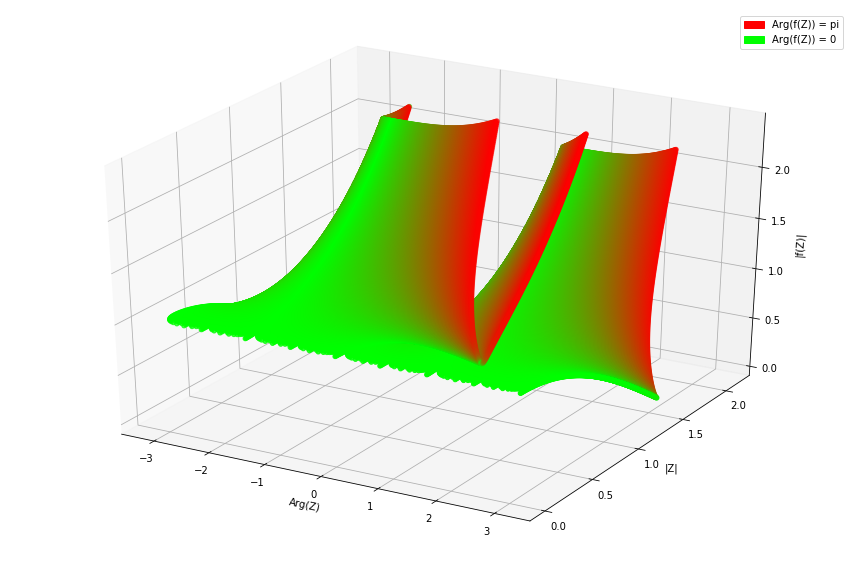

Loaded in 12.040000000000001 seconds
Calculating coordinates
Finished computing in 2.27 seconds
Colourmap generated
Drawn in 6.92 seconds
Estimated load time: 20.700000000000003 seconds


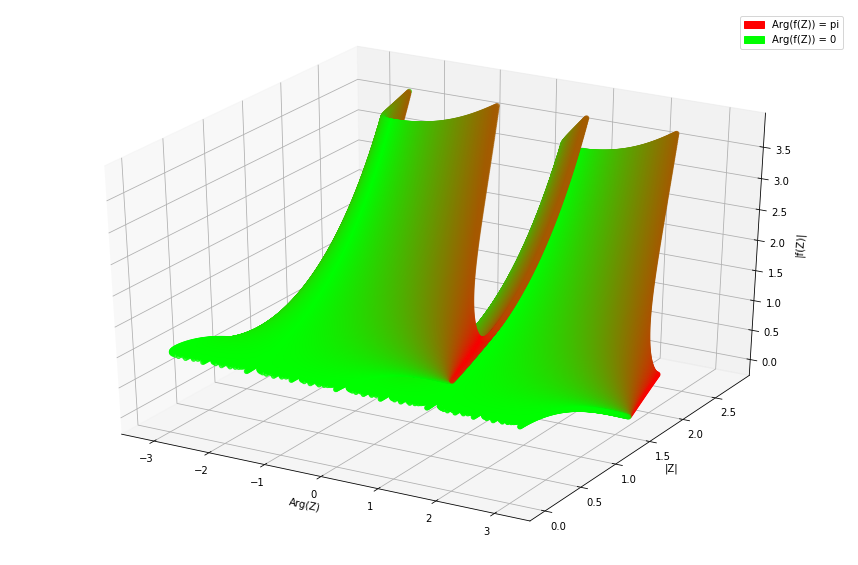

Loaded in 12.530000000000001 seconds
Calculating coordinates
Finished computing in 1.12 seconds
Colourmap generated
Drawn in 5.38 seconds
Estimated load time: 15.900000000000002 seconds


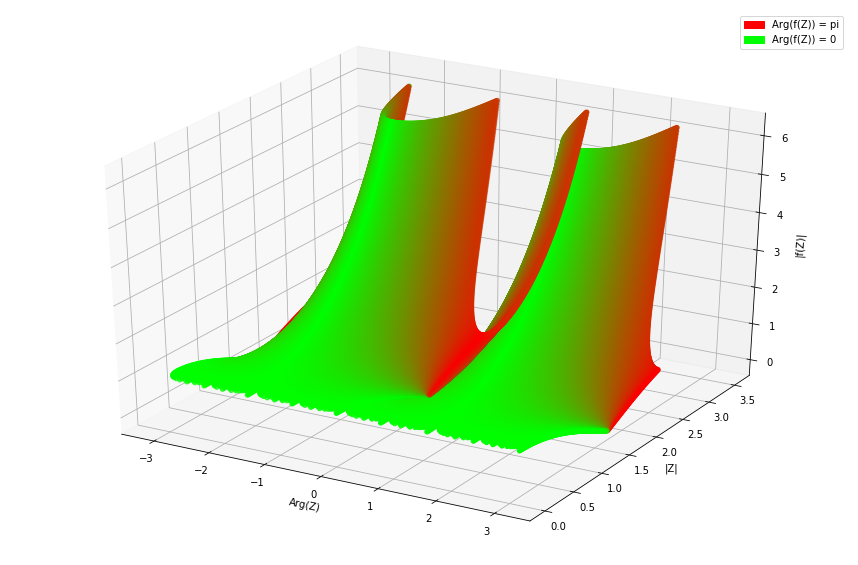

Loaded in 12.19 seconds
Calculating coordinates
Finished computing in 1.1400000000000001 seconds
Colourmap generated
Drawn in 5.66 seconds
Estimated load time: 16.8 seconds


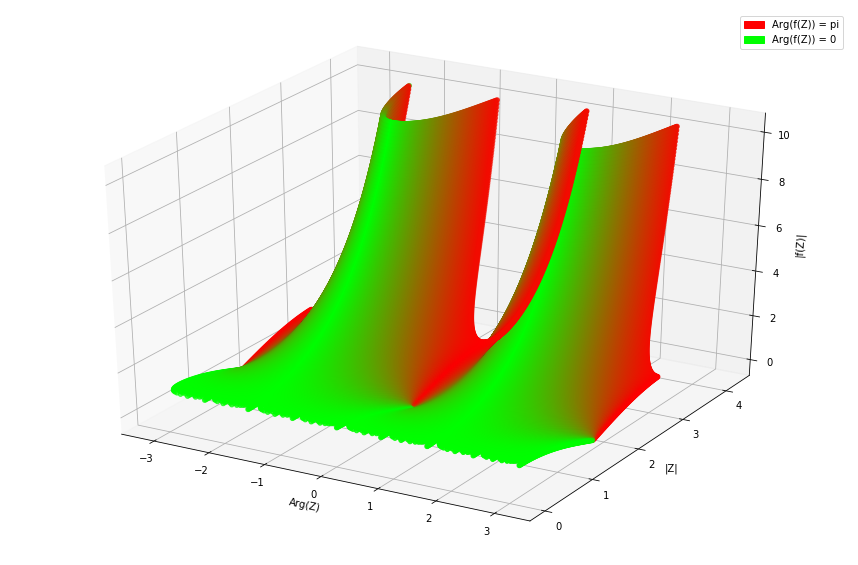

Loaded in 12.3 seconds
Calculating coordinates
Finished computing in 2.45 seconds
Colourmap generated
Drawn in 8.2 seconds
Estimated load time: 24.6 seconds


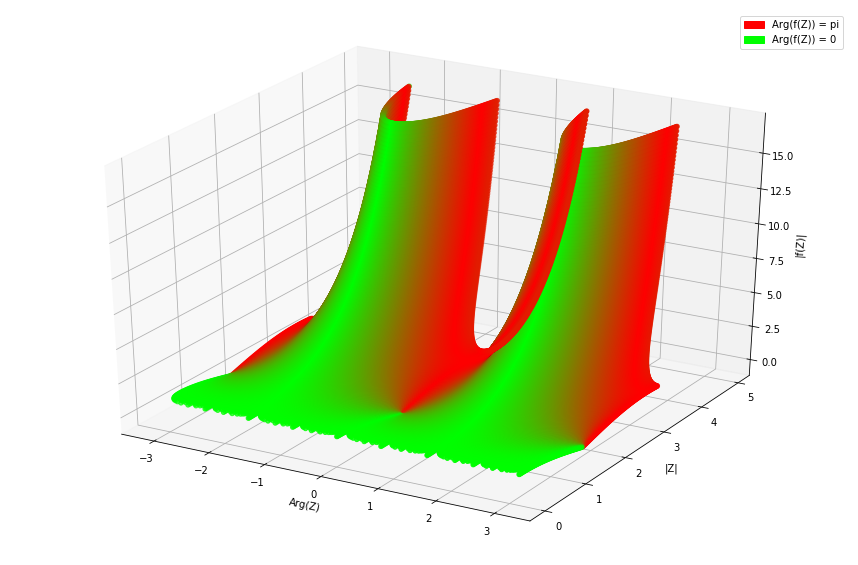

Loaded in 13.96 seconds
Calculating coordinates
Finished computing in 1.12 seconds
Colourmap generated
Drawn in 5.75 seconds
Estimated load time: 17.1 seconds


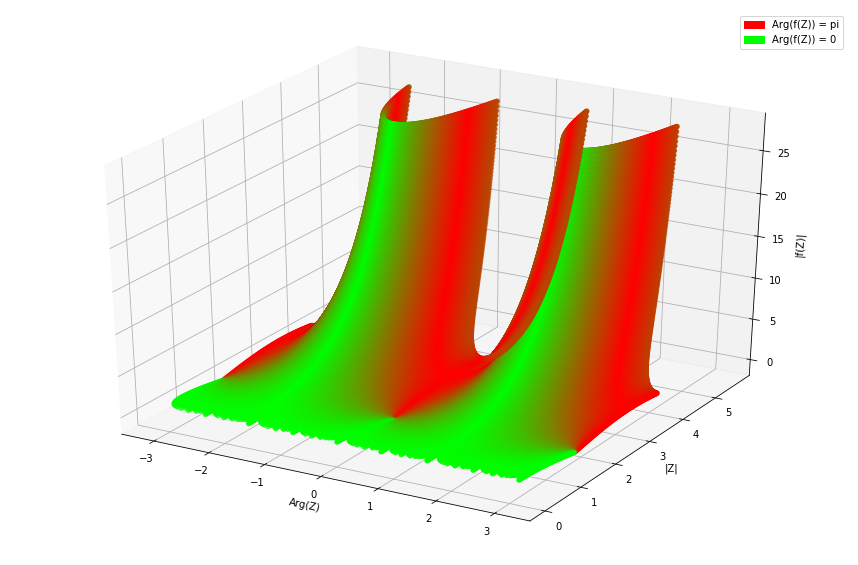

Loaded in 11.73 seconds
Calculating coordinates
Finished computing in 1.1300000000000001 seconds
Colourmap generated
Drawn in 5.5200000000000005 seconds
Estimated load time: 16.5 seconds


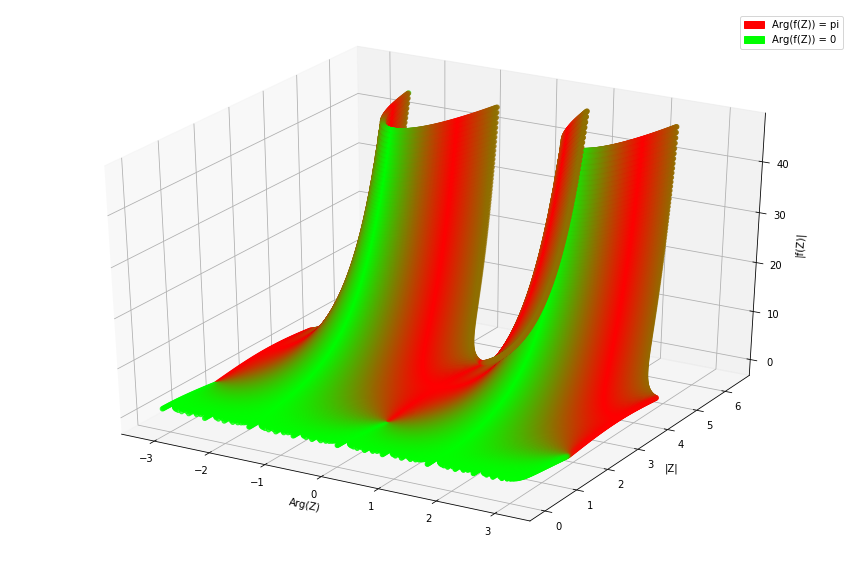

Loaded in 12.24 seconds
Calculating coordinates
Finished computing in 1.1400000000000001 seconds
Colourmap generated
Drawn in 4.88 seconds
Estimated load time: 14.400000000000002 seconds


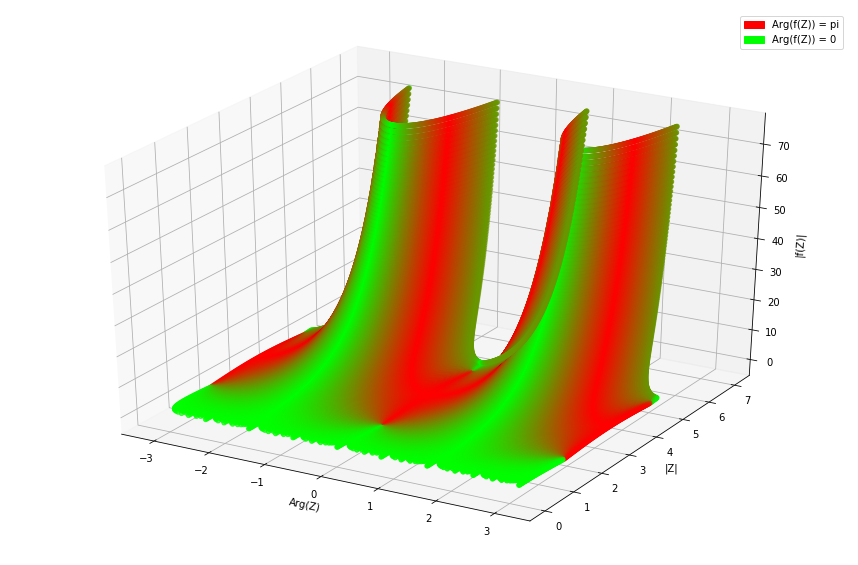

Loaded in 13.370000000000001 seconds
Calculating coordinates
Finished computing in 1.6300000000000001 seconds
Colourmap generated
Drawn in 10.06 seconds
Estimated load time: 30.0 seconds


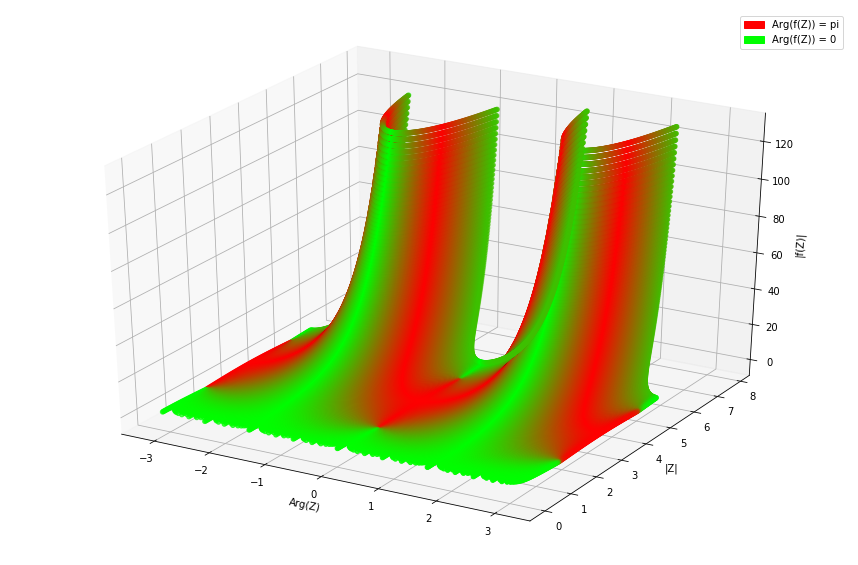

Loaded in 12.08 seconds
Calculating coordinates
Finished computing in 1.12 seconds
Colourmap generated
Drawn in 5.72 seconds
Estimated load time: 17.1 seconds


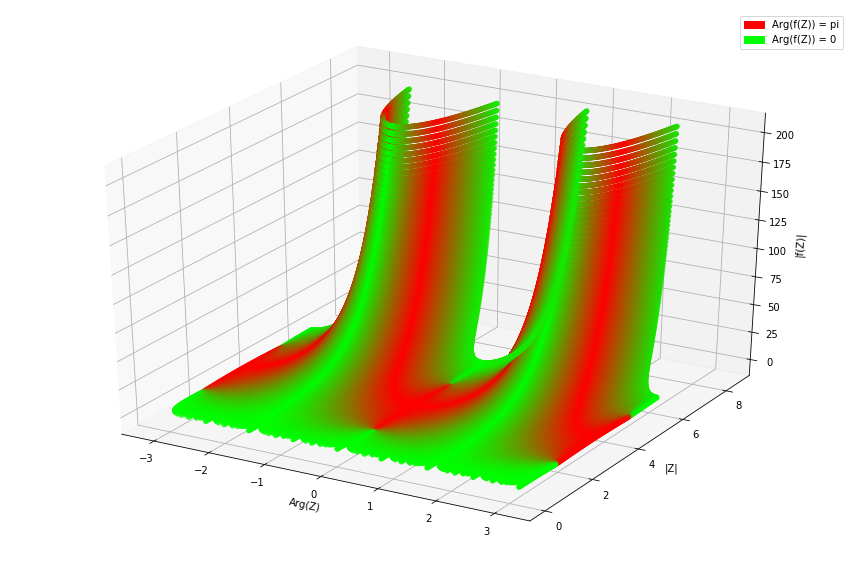

Loaded in 13.25 seconds


In [320]:
for i in range(1,13,1):
    cdraw([[-i/2,-i/2],[i/2,i/2]], 400, "polar1")